<a href="https://colab.research.google.com/github/Betsabeh/Python_codes-tutorial-/blob/main/CNN_10dig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## Loading the data
mnist_bldr = tfds.builder('mnist')
mnist_bldr.download_and_prepare()
datasets = mnist_bldr.as_dataset(shuffle_files=False)
mnist_train_orig = datasets['train']
mnist_test_orig = datasets['test']


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.YY8IW4_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.YY8IW4_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
# Train , Vaildation, Test set
BATCH_SIZE = 64
NUM_EPOCHS = 20
mnist_train = mnist_train_orig.map(lambda item: (tf.cast(item['image'], tf.float32)/255.0,tf.cast(item['label'], tf.int32)))
mnist_test = mnist_test_orig.map(lambda item: (tf.cast(item['image'], tf.float32)/255.0,tf.cast(item['label'], tf.int32)))
tf.random.set_seed(1)
mnist_valid = mnist_train.take(10000).batch(BATCH_SIZE)
mnist_train = mnist_train.skip(10000).batch(BATCH_SIZE)

In [4]:
#CNN model creating
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), strides=(1, 1),
                                 padding='same', data_format='channels_last',
                                 name='conv_1', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_1'))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5),
                                 strides=(1, 1), padding='same',
                                 name='conv_2', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))

model.compute_output_shape(input_shape=(16, 28, 28, 1))
print("Final CNN layer output shape:",tf.TensorShape([16, 7, 7, 64]))

model.add(tf.keras.layers.Flatten())
model.compute_output_shape(input_shape=(16, 28, 28, 1))
print("After Faltten output shape:",tf.TensorShape([16, 3136]))

model.add(tf.keras.layers.Dense(units=1024, name='fc_1',activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(  units=10, name='fc_2',  activation='softmax'))

Final CNN layer output shape: (16, 7, 7, 64)
After Faltten output shape: (16, 3136)


In [5]:
# build and compile the model
tf.random.set_seed(1)
model.build(input_shape=(None, 28, 28, 1))
model.compile( optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

#train the model
history = model.fit(mnist_train, epochs=NUM_EPOCHS,validation_data=mnist_valid,
                    shuffle=True)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9048 - loss: 0.3021 - val_accuracy: 0.9854 - val_loss: 0.0488
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9837 - loss: 0.0546 - val_accuracy: 0.9868 - val_loss: 0.0498
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9889 - loss: 0.0353 - val_accuracy: 0.9889 - val_loss: 0.0371
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9921 - loss: 0.0238 - val_accuracy: 0.9903 - val_loss: 0.0378
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9931 - loss: 0.0215 - val_accuracy: 0.9915 - val_loss: 0.0334
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9942 - loss: 0.0177 - val_accuracy: 0.9912 - val_loss: 0.0374
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9954 - loss: 0.0143 - val_accuracy: 0.9913 - val_loss: 0.0352
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9958 - loss: 0.0122 - val_accuracy: 

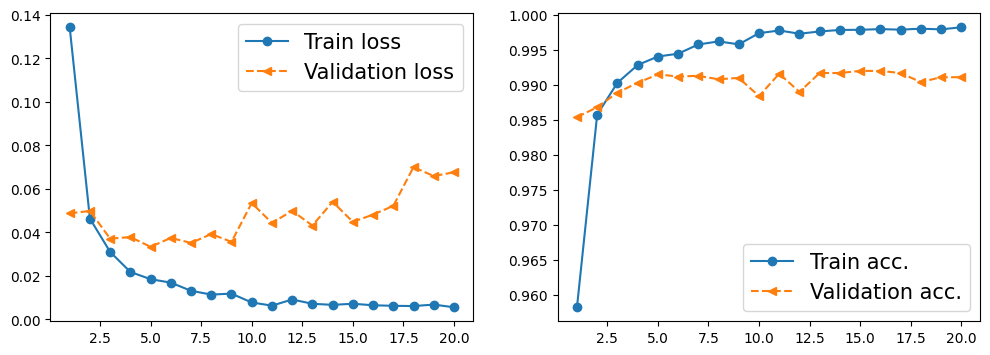

In [8]:
#Plot the results
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<',         label='Validation acc.')
ax.legend(fontsize=15)
plt.show()

In [9]:
#test
test_results = model.evaluate(mnist_test.batch(20))
print('Test Acc.: {:.2f}\%'.format(test_results[1]*100))


<>:3: SyntaxWarning: invalid escape sequence '\%'
<>:3: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipython-input-1914632546.py:3: SyntaxWarning: invalid escape sequence '\%'
  print('Test Acc.: {:.2f}\%'.format(test_results[1]*100))


500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9918 - loss: 0.0407
Test Acc.: 99.29\%
